In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
sns = pd.read_csv("../../data/bigcontest/03_SNS데이터(와이즈넛)/2020 bigcontest data_wisenut.csv", sep='', encoding='utf-8')

In [3]:
sns.head()

,SEQ,GU_CD,GU_NM(삭제),DONG_CD,DONG_NM(삭제),NEWS_CNT_201902,NEWS_CNT_201903,NEWS_CNT_201904,NEWS_CNT_201905,NEWS_CNT_202002,...,UP5_NEGATIVE_202004,UP5_NEGATIVE_202005,UP6_NEGATIVE_201902,UP6_NEGATIVE_201903,UP6_NEGATIVE_201904,UP6_NEGATIVE_201905,UP6_NEGATIVE_202002,UP6_NEGATIVE_202003,UP6_NEGATIVE_202004,UP6_NEGATIVE_202005
0,1,140,서울 중구,520,소공동,4,6,16,34,26,...,24,0,7,11,186,5,1,6,0,10
1,2,140,서울 중구,540,회현동,4,0,8,27,15,...,27,17,49,1,63,251,0,58,0,71
2,3,140,서울 중구,550,명동,6,16,29,44,162,...,35,46,34,74,226,137,17,84,22,326
3,4,140,서울 중구,570,필동,0,1,5,24,2,...,24,0,1,17,162,14,0,46,22,37
4,5,140,서울 중구,580,장충동,13,8,13,34,20,...,8,17,0,0,199,12,5,0,22,125


In [4]:
sns = sns.rename({'GU_NM(삭제)':'GU_NM','DONG_NM(삭제)':'DONG_NM'}, axis='columns')

In [5]:
sns.head()

,SEQ,GU_CD,GU_NM,DONG_CD,DONG_NM,NEWS_CNT_201902,NEWS_CNT_201903,NEWS_CNT_201904,NEWS_CNT_201905,NEWS_CNT_202002,...,UP5_NEGATIVE_202004,UP5_NEGATIVE_202005,UP6_NEGATIVE_201902,UP6_NEGATIVE_201903,UP6_NEGATIVE_201904,UP6_NEGATIVE_201905,UP6_NEGATIVE_202002,UP6_NEGATIVE_202003,UP6_NEGATIVE_202004,UP6_NEGATIVE_202005
0,1,140,서울 중구,520,소공동,4,6,16,34,26,...,24,0,7,11,186,5,1,6,0,10
1,2,140,서울 중구,540,회현동,4,0,8,27,15,...,27,17,49,1,63,251,0,58,0,71
2,3,140,서울 중구,550,명동,6,16,29,44,162,...,35,46,34,74,226,137,17,84,22,326
3,4,140,서울 중구,570,필동,0,1,5,24,2,...,24,0,1,17,162,14,0,46,22,37
4,5,140,서울 중구,580,장충동,13,8,13,34,20,...,8,17,0,0,199,12,5,0,22,125


In [6]:
# 날짜
d = ['201902', '201903', '201904', '201905', '202002', '202003', '202004', '202005']

In [7]:
base_col = ['SEQ', 'GU_CD', 'GU_NM']

In [8]:
print(sns.columns)

Index(['SEQ', 'GU_CD', 'GU_NM', 'DONG_CD', 'DONG_NM', 'NEWS_CNT_201902',
       'NEWS_CNT_201903', 'NEWS_CNT_201904', 'NEWS_CNT_201905',
       'NEWS_CNT_202002',
       ...
       'UP5_NEGATIVE_202004', 'UP5_NEGATIVE_202005', 'UP6_NEGATIVE_201902',
       'UP6_NEGATIVE_201903', 'UP6_NEGATIVE_201904', 'UP6_NEGATIVE_201905',
       'UP6_NEGATIVE_202002', 'UP6_NEGATIVE_202003', 'UP6_NEGATIVE_202004',
       'UP6_NEGATIVE_202005'],
      dtype='object', length=133)


# 1. 뉴스, 블로그, 카페 건수 전년대비 비교

In [9]:
def make_cnt_df(pf):
    col_list = []
    for i in d:
        col_list.append(pf + '_CNT_' + i)
    return sns[col_list]

### 1) NEW_CNT : 뉴스 건수

In [10]:
NEWS_CNT = make_cnt_df('NEWS')

In [11]:
NEWS_CNT.head()

,NEWS_CNT_201902,NEWS_CNT_201903,NEWS_CNT_201904,NEWS_CNT_201905,NEWS_CNT_202002,NEWS_CNT_202003,NEWS_CNT_202004,NEWS_CNT_202005
0,4,6,16,34,26,3,9,8
1,4,0,8,27,15,25,5,10
2,6,16,29,44,162,45,38,33
3,0,1,5,24,2,25,17,5
4,13,8,13,34,20,2,17,3


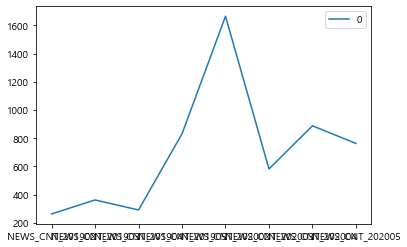

In [12]:
pd.DataFrame(NEWS_CNT.sum()).plot()

### 2) BLOG_CNT : 블로그 건수

In [13]:
BLOG_CNT = make_cnt_df('BLOG')
BLOG_CNT.head()

,BLOG_CNT_201902,BLOG_CNT_201903,BLOG_CNT_201904,BLOG_CNT_201905,BLOG_CNT_202002,BLOG_CNT_202003,BLOG_CNT_202004,BLOG_CNT_202005
0,139,595,810,398,212,152,94,196
1,230,512,789,508,226,319,121,320
2,499,1300,1633,1092,520,695,259,589
3,186,506,747,680,142,216,77,246
4,213,694,886,326,287,345,104,458


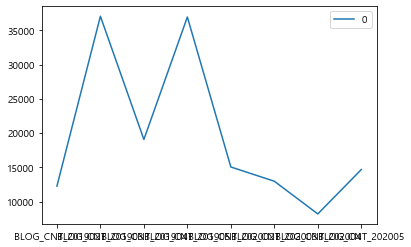

In [14]:
pd.DataFrame(BLOG_CNT.sum()).plot()

### 3) CAFE_CNT : 블로그 건수

In [15]:
CAFE_CNT = make_cnt_df('CAFE')
CAFE_CNT.head()

,CAFE_CNT_201902,CAFE_CNT_201903,CAFE_CNT_201904,CAFE_CNT_201905,CAFE_CNT_202002,CAFE_CNT_202003,CAFE_CNT_202004,CAFE_CNT_202005
0,13,1,76,80,289,122,102,6
1,16,46,87,73,295,134,126,9
2,70,119,186,114,368,233,159,567
3,13,57,60,71,280,127,71,0
4,13,51,66,84,351,165,142,60


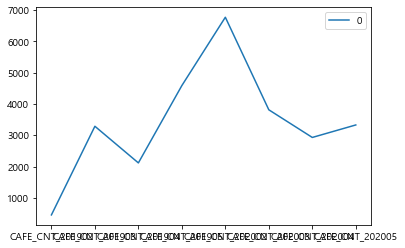

In [16]:
pd.DataFrame(CAFE_CNT.sum()).plot()

# 2. 구+행정동에 대한 화제어

In [17]:
col_list = []
for i in d:
    col_list.append('UP_TOPIC_' + i)
UP_TOPIC = sns[base_col + col_list]

In [18]:
UP_TOPIC.head()

,SEQ,GU_CD,GU_NM,UP_TOPIC_201902,UP_TOPIC_201903,UP_TOPIC_201904,UP_TOPIC_201905,UP_TOPIC_202002,UP_TOPIC_202003,UP_TOPIC_202004,UP_TOPIC_202005
0,1,140,서울 중구,"장관,기념식,창간,롯데호텔,뷔페","총동창회,서울대,박물관,월드비전,프로그램","기생충,반민특위,강원도,이재민,푯돌","동계올림픽,은퇴,여제,기자회견,눈물","롯데백화점,마포공덕점,프레지던트호텔,코로나바이러스,확진자","직원,롯데호텔,콜센터,코로나,확진자","도시계획위원회,정비계획,재개발구역,서소문,정비수법","창조인상,생명과학부,예술감독,코로나19,RNA"
1,2,140,서울 중구,"회현동,서울역,도시재생,윤동주,일제강점기","남산,케이블카,남산둘레길,국립극장,남산타워","서울지방경찰청,경복궁역,종교교회,용비어천가,종로구","저작권,녹색교통지역,기부채납,최고,인지","남산,남촌,중림,고도제한,개발제한","코로나19,남산둘레길,기부 행렬,랜드마크,남녀노소","코로나19,구조조정,산업단지,원장,각하","시민아파트,시범아파트,서울시장,충정아파트,회현"
2,3,140,서울 중구,"생활유산,열쇠고리,신세계백화점,리뉴얼,관광객","문화재,도시재생사업,을지로,등록문화재,보존","반민특위,푯돌,충무로,생활형숙박시설,하늘N","중구,문화예술인,문화도시,쓰레기,미화원","롯데백화점,코로나바이러스감염증,관광객,소상공인,확진자","확진자,중구,코로나,숙박시설,중국인","학원,코로나,확진자,집단감염,유흥업소","마스크,선별진료소,면마스크,천마스크,확진환자"
3,4,140,서울 중구,"저작권,영남상생포럼,자유한국장,지적,그랜드호텔","저작권,다가구주택,주주총회,주식회사,보증금","저작권,등록,기간,매각,유산","비용,주소,등록,신용불량자,유산","인테리어,도배장판,업체,거실,비용","케이블카,남산둘레길,남산타워,국립극장,남산","코로나,업종,감소율,자영업자,재난","코로나19,본점,주류,리스,양도"
4,5,140,서울 중구,"빵집,태극당,신라호텔,세관,감사원","프로포폴,호텔신라,이부진,투약,불법","신부,예비신랑,신라호텔,대학병원,결혼식","덴마크,왕세자,명예시민증,왕세자비,신라호텔","호텔신라,한옥호텔,착공,전통호텔,도시계획위원회","호텔신라,이부진,신라면세점,신라호텔,착공","코로나,업종,감소율,자영업자,재난","코로나,신세계조선호텔,브랜드,한옥호텔,특급호텔"


# 3. 대분류(업종)에 대한 긍정/부정 게시량

In [19]:
def make_category_df(ctg):
    col_list = []
    for i in d:
        col_list.append(ctg + '_POSITIVE_' + i)
        col_list.append(ctg + '_NEGATIVE_' + i)
    return sns[base_col + col_list]

In [20]:
def melt_df(df):
    df = df.drop(['SEQ','GU_CD'] ,axis =1)
    DF = df.melt(id_vars = "GU_NM", var_name = "VALUE", value_name = "CNT")
    DF['STD_YM'] = DF['VALUE'].apply(lambda x : x[-6 :])
    DF['REACT'] = DF['VALUE'].apply(lambda x : x[4:12])
    return DF

In [21]:
def make_plot(df, region):
    df[df.GU_NM == region].pivot_table(index='STD_YM', columns='REACT', values='CNT', aggfunc='sum').plot()
    plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))
    plt.title(region)

### 1) 대분류1 : 숙박

In [22]:
UP1 = make_category_df('UP1')
UP1_DF = melt_df(UP1)
UP1_DF.head()

,GU_NM,VALUE,CNT,STD_YM,REACT
0,서울 중구,UP1_POSITIVE_201902,5,201902,POSITIVE
1,서울 중구,UP1_POSITIVE_201902,13,201902,POSITIVE
2,서울 중구,UP1_POSITIVE_201902,106,201902,POSITIVE
3,서울 중구,UP1_POSITIVE_201902,32,201902,POSITIVE
4,서울 중구,UP1_POSITIVE_201902,29,201902,POSITIVE


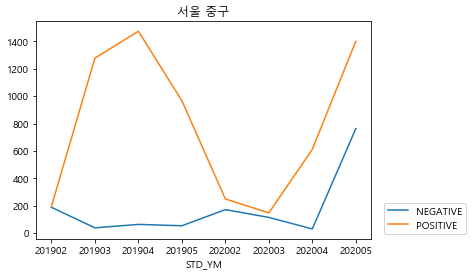

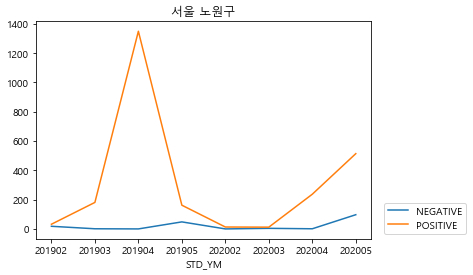

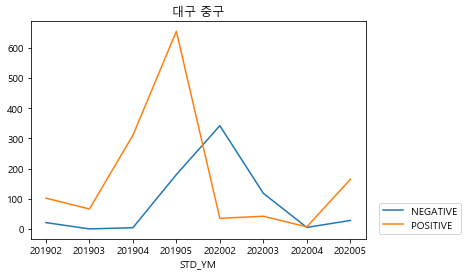

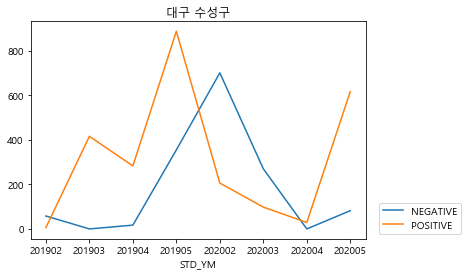

In [23]:
make_plot(UP1_DF, '서울 중구')
make_plot(UP1_DF, '서울 노원구')
make_plot(UP1_DF, '대구 중구')
make_plot(UP1_DF, '대구 수성구')

### 2) 대분류2 : 레저업소

In [24]:
UP2 = make_category_df('UP2')
UP2_DF = melt_df(UP2)
UP2_DF.head(10)

,GU_NM,VALUE,CNT,STD_YM,REACT
0,서울 중구,UP2_POSITIVE_201902,0,201902,POSITIVE
1,서울 중구,UP2_POSITIVE_201902,0,201902,POSITIVE
2,서울 중구,UP2_POSITIVE_201902,0,201902,POSITIVE
3,서울 중구,UP2_POSITIVE_201902,0,201902,POSITIVE
4,서울 중구,UP2_POSITIVE_201902,2,201902,POSITIVE
5,서울 중구,UP2_POSITIVE_201902,0,201902,POSITIVE
6,서울 중구,UP2_POSITIVE_201902,19,201902,POSITIVE
7,서울 중구,UP2_POSITIVE_201902,0,201902,POSITIVE
8,서울 중구,UP2_POSITIVE_201902,0,201902,POSITIVE
9,서울 중구,UP2_POSITIVE_201902,0,201902,POSITIVE


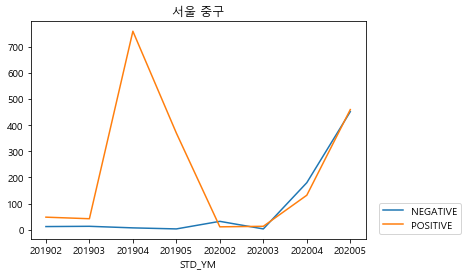

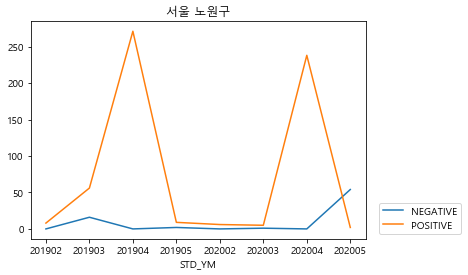

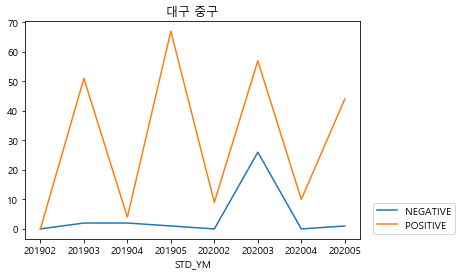

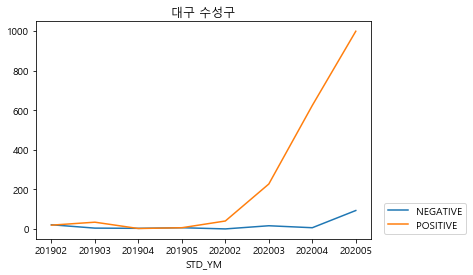

In [25]:
make_plot(UP2_DF, '서울 중구')
make_plot(UP2_DF, '서울 노원구')
make_plot(UP2_DF, '대구 중구')
make_plot(UP2_DF, '대구 수성구')

### 3) 대분류3 : 문화취미

In [26]:
UP3 = make_category_df('UP3')
UP3_DF = melt_df(UP3)
UP3_DF.head(10)

,GU_NM,VALUE,CNT,STD_YM,REACT
0,서울 중구,UP3_POSITIVE_201902,3,201902,POSITIVE
1,서울 중구,UP3_POSITIVE_201902,108,201902,POSITIVE
2,서울 중구,UP3_POSITIVE_201902,213,201902,POSITIVE
3,서울 중구,UP3_POSITIVE_201902,77,201902,POSITIVE
4,서울 중구,UP3_POSITIVE_201902,34,201902,POSITIVE
5,서울 중구,UP3_POSITIVE_201902,59,201902,POSITIVE
6,서울 중구,UP3_POSITIVE_201902,92,201902,POSITIVE
7,서울 중구,UP3_POSITIVE_201902,0,201902,POSITIVE
8,서울 중구,UP3_POSITIVE_201902,0,201902,POSITIVE
9,서울 중구,UP3_POSITIVE_201902,0,201902,POSITIVE


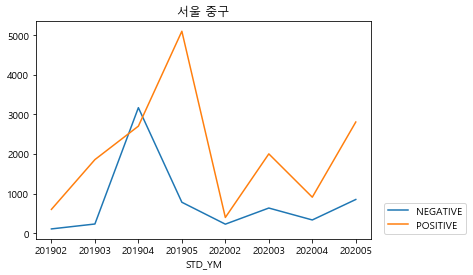

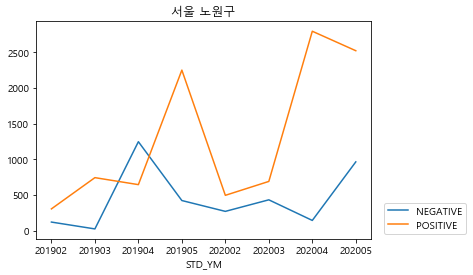

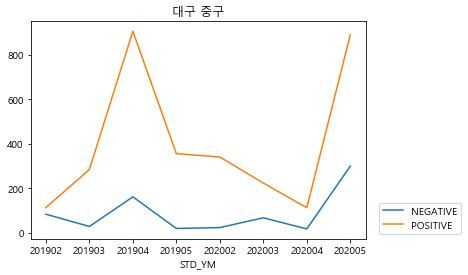

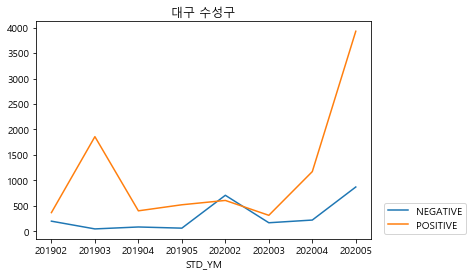

In [27]:
make_plot(UP3_DF, '서울 중구')
make_plot(UP3_DF, '서울 노원구')
make_plot(UP3_DF, '대구 중구')
make_plot(UP3_DF, '대구 수성구')

### 4) 대분류4 : 의료기관

In [28]:
UP4 = make_category_df('UP4')
UP4_DF = melt_df(UP4)
UP4_DF.head(10)

,GU_NM,VALUE,CNT,STD_YM,REACT
0,서울 중구,UP4_POSITIVE_201902,0,201902,POSITIVE
1,서울 중구,UP4_POSITIVE_201902,0,201902,POSITIVE
2,서울 중구,UP4_POSITIVE_201902,38,201902,POSITIVE
3,서울 중구,UP4_POSITIVE_201902,11,201902,POSITIVE
4,서울 중구,UP4_POSITIVE_201902,0,201902,POSITIVE
5,서울 중구,UP4_POSITIVE_201902,0,201902,POSITIVE
6,서울 중구,UP4_POSITIVE_201902,76,201902,POSITIVE
7,서울 중구,UP4_POSITIVE_201902,0,201902,POSITIVE
8,서울 중구,UP4_POSITIVE_201902,0,201902,POSITIVE
9,서울 중구,UP4_POSITIVE_201902,0,201902,POSITIVE


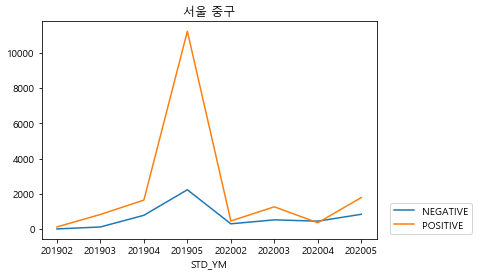

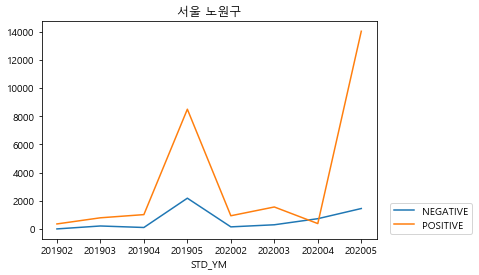

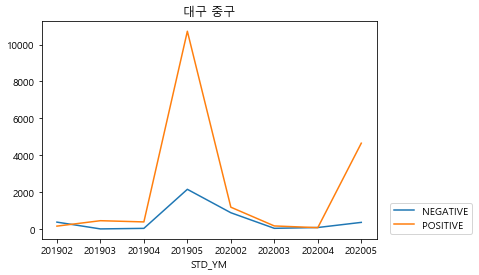

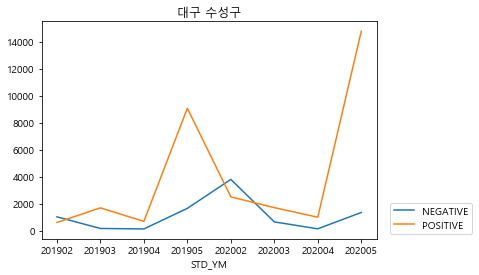

In [29]:
make_plot(UP4_DF, '서울 중구')
make_plot(UP4_DF, '서울 노원구')
make_plot(UP4_DF, '대구 중구')
make_plot(UP4_DF, '대구 수성구')

### 5) 대분류5 : 보건위생

In [30]:
UP5 = make_category_df('UP5')
UP5_DF = melt_df(UP5)
UP5_DF.head(10)

,GU_NM,VALUE,CNT,STD_YM,REACT
0,서울 중구,UP5_POSITIVE_201902,0,201902,POSITIVE
1,서울 중구,UP5_POSITIVE_201902,0,201902,POSITIVE
2,서울 중구,UP5_POSITIVE_201902,13,201902,POSITIVE
3,서울 중구,UP5_POSITIVE_201902,0,201902,POSITIVE
4,서울 중구,UP5_POSITIVE_201902,0,201902,POSITIVE
5,서울 중구,UP5_POSITIVE_201902,0,201902,POSITIVE
6,서울 중구,UP5_POSITIVE_201902,17,201902,POSITIVE
7,서울 중구,UP5_POSITIVE_201902,0,201902,POSITIVE
8,서울 중구,UP5_POSITIVE_201902,0,201902,POSITIVE
9,서울 중구,UP5_POSITIVE_201902,0,201902,POSITIVE


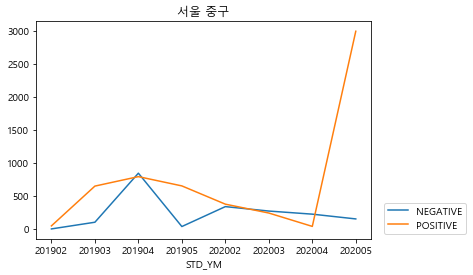

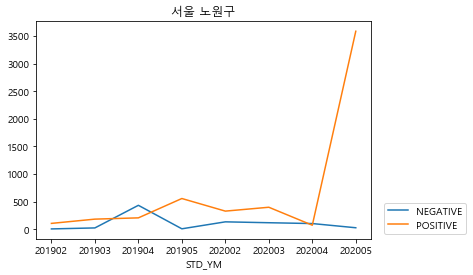

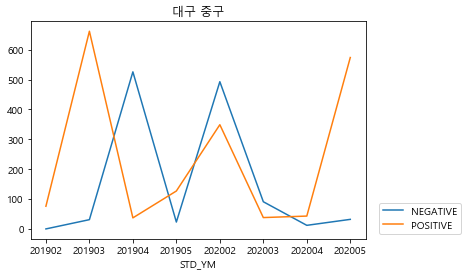

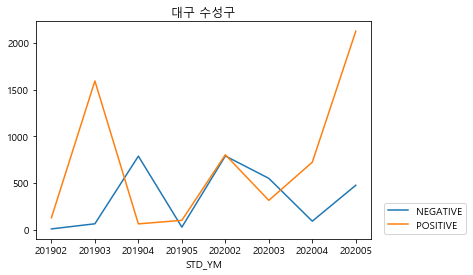

In [31]:
make_plot(UP5_DF, '서울 중구')
make_plot(UP5_DF, '서울 노원구')
make_plot(UP5_DF, '대구 중구')
make_plot(UP5_DF, '대구 수성구')

### 6) 대분류6 : 요식업소

In [32]:
UP6 = make_category_df('UP6')
UP6_DF = melt_df(UP6)
UP6_DF.head(10)

,GU_NM,VALUE,CNT,STD_YM,REACT
0,서울 중구,UP6_POSITIVE_201902,16,201902,POSITIVE
1,서울 중구,UP6_POSITIVE_201902,330,201902,POSITIVE
2,서울 중구,UP6_POSITIVE_201902,528,201902,POSITIVE
3,서울 중구,UP6_POSITIVE_201902,284,201902,POSITIVE
4,서울 중구,UP6_POSITIVE_201902,45,201902,POSITIVE
5,서울 중구,UP6_POSITIVE_201902,283,201902,POSITIVE
6,서울 중구,UP6_POSITIVE_201902,474,201902,POSITIVE
7,서울 중구,UP6_POSITIVE_201902,0,201902,POSITIVE
8,서울 중구,UP6_POSITIVE_201902,0,201902,POSITIVE
9,서울 중구,UP6_POSITIVE_201902,0,201902,POSITIVE


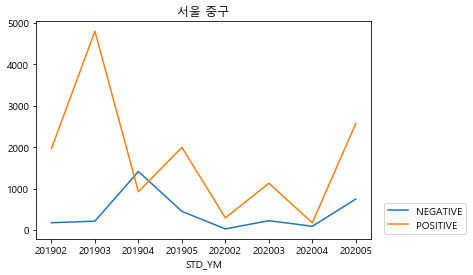

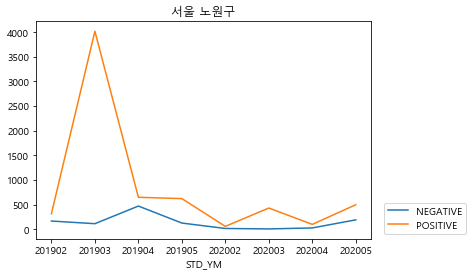

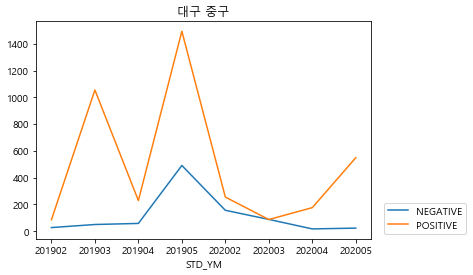

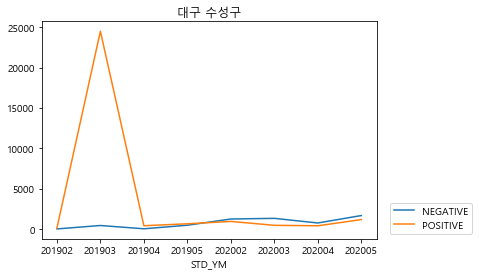

In [33]:
make_plot(UP6_DF, '서울 중구')
make_plot(UP6_DF, '서울 노원구')
make_plot(UP6_DF, '대구 중구')
make_plot(UP6_DF, '대구 수성구')